In [16]:
import pandas as pd 
import matplotlib.pyplot as plt
df_cosine = pd.read_csv(filepath_or_buffer= './data/results_cosine.csv')
df_cosine["precision"] = df_cosine["precision"].str.extract(r'tensor\((.+)\)')[0].astype(float)
df_cosine["recall"] = df_cosine["recall"].str.extract(r'tensor\((.+)\)')[0].astype(float)
df_cosine["f1"] = df_cosine["f1"].str.extract(r'tensor\((.+)\)')[0].astype(float)
df_cosine.head()

,question,contexts,answer,predicted_answer,doc_mrr_evaluator,faithfulness,sas_evaluator,precision,recall,f1
0,What types of road improvements are planned fo...,[Document(id=f95bc20f333ffa6abfc9a89b3ea378153...,"['Additional lanes', 'Standard overlay/ADA imp...","Additional lanes, standard overlay, bridge rep...",0.166667,0.0,0.894818,0.9345,0.8829,0.9080
1,How did the average miles per shipment for sin...,[Document(id=cfda495d08550cdd689d57fea5aee07d1...,"['For truck, it increased from 144 to 206 mile...",The average miles per shipment for single mode...,1.000000,0.0,0.491738,0.8753,0.8651,0.8702
2,What is the total greenhouse gas reduction in ...,[Document(id=5e3f402db9ce4879a4ef7f09e76e890f0...,"['80,829']",Total greenhouse gas reduction in metric tons ...,1.000000,0.0,0.217768,0.7867,0.7906,0.7887
3,What is the importance of accurate estimation ...,[Document(id=66620ade4dde9d9557bf1ab9a84a99598...,"['All around the world, system operators and u...",Accurate real-time estimation of available max...,0.500000,0.5,0.387266,0.8483,0.8445,0.8464
4,What are some potential vulnerabilities of und...,[Document(id=4a2898531fc133b3838e33341136891bb...,"['vulnerability to extreme seismic events', 'p...",The vulnerability of underground-sited reactor...,1.000000,0.0,0.693723,0.8853,0.9046,0.8949


In [34]:
from bert_score import score

def compute_bertscore(prediction: str, reference: str) -> tuple:
    #Inputs have to be lists so wrap them 
    predictions = [prediction]
    references = [reference]

    results = score(predictions, references, lang='en')

    precision = results[0].item()
    recall = results[1].item()
    f1 = results[2].item()
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)  

    return precision, recall, f1

# Example usage:
prediction = 'The text emphasizes the importance of accurate estimation of available PV power for several reasons: Grid reliability, accurate estimation is crucial for grid operators...'
reference = 'All around the world, system operators and utilities are continually adapting their grid codes, interconnection requirements...'

precision, recall, f1 = compute_bertscore(prediction, reference)

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Precision: 0.8663163185119629
Recall: 0.8742483854293823
F1 Score: 0.8702642917633057


In [ ]:
df.columns

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Precision: 0.8663163185119629
Recall: 0.8742483854293823
F1 Score: 0.8702642917633057


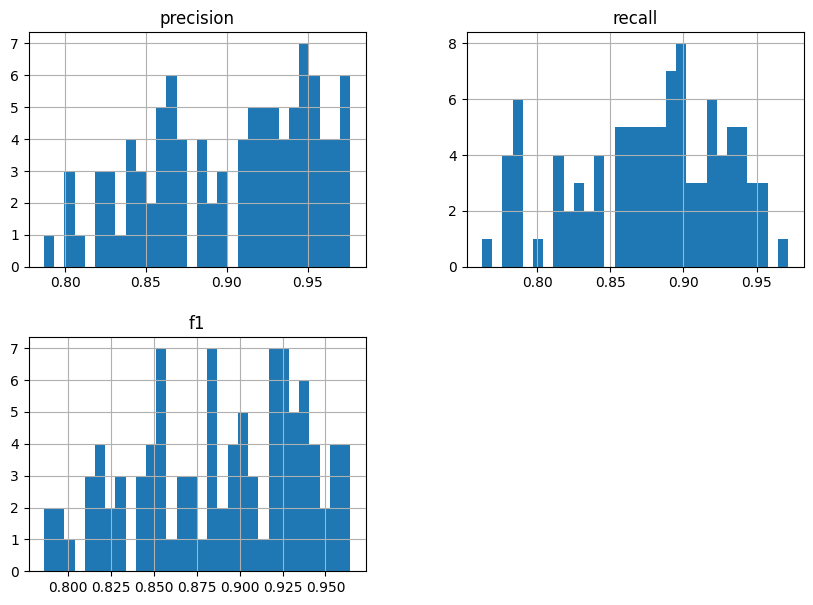

In [19]:
df[['precision', 'recall', 'f1']].hist(bins=30, figsize=(10, 7))

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Basic Histogram')

plt.show()

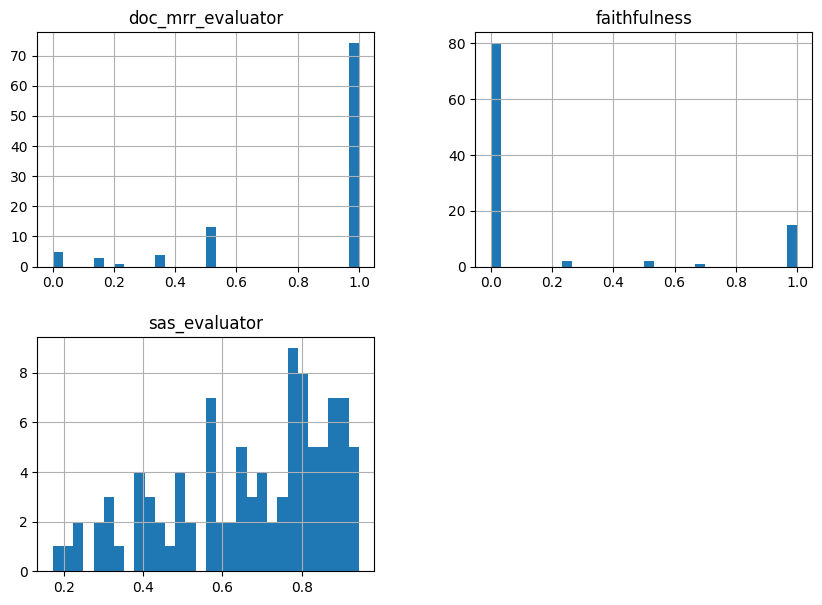

In [27]:
#Histograms
df[['doc_mrr_evaluator', 'faithfulness', 'sas_evaluator']].hist(bins=30, figsize=(10, 7))

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Basic Histogram')

plt.show()

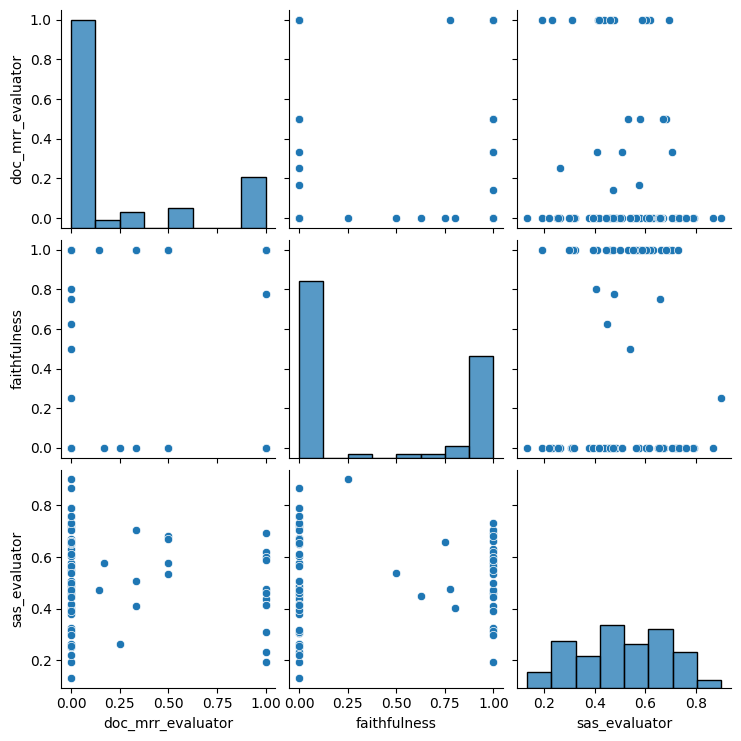

In [ ]:
#Pairplots
import seaborn as sns
sns.pairplot(df[['doc_mrr_evaluator', 'faithfulness', 'sas_evaluator']])

In [ ]:
#Covariance Matrix
columns_to_check = ['doc_mrr_evaluator', 'faithfulness', 'sas_evaluator']
cov_matrix = df[columns_to_check].cov()

print(cov_matrix)

                   doc_mrr_evaluator  faithfulness  sas_evaluator
doc_mrr_evaluator           0.143611      0.032981      -0.007053
faithfulness                0.032981      0.224378       0.004352
sas_evaluator              -0.007053      0.004352       0.031605


In [110]:
import os
import pandas as pd

def highest_eval(folder_path, evaluators):
    highest_values = {}
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.csv'):
            file_path = os.path.join(folder_path, file_name)

            try:
                # Read the CSV file
                df = pd.read_csv(file_path)

                # Check if the specified columns exist
                if isinstance(evaluators, str):  # Single column
                    if evaluators in df.columns:
                        highest_values[file_name] = df[evaluators].mean()
                    else:
                        print(f"Warning: '{evaluators}' column not found in {file_name}")
                elif isinstance(evaluators, list):  # Multiple columns
                    missing_cols = [col for col in evaluators if col not in df.columns]
                    if missing_cols:
                        print(f"Warning: Columns {missing_cols} not found in {file_name}")
                    else:
                        highest_values[file_name] = df[evaluators].mean(axis=1).max()
                else:
                    print("Error: 'evaluators' should be a string or list of strings.")
            except Exception as e:
                print(f"Error processing file {file_name}: {e}")

    return highest_values

<>:14: SyntaxWarning: invalid escape sequence '\m'
<>:14: SyntaxWarning: invalid escape sequence '\m'
<>:14: SyntaxWarning: invalid escape sequence '\m'
<>:14: SyntaxWarning: invalid escape sequence '\m'
/var/folders/rs/lp_7j4vj5_s59_pr61yffxl80000gn/T/ipykernel_6861/3077335605.py:14: SyntaxWarning: invalid escape sequence '\m'
  new_key = f'$\mathbf{{Embedding}}$: {embedding_model_name}, $\mathbf{{LLM}}$: {llm_name}'
/var/folders/rs/lp_7j4vj5_s59_pr61yffxl80000gn/T/ipykernel_6861/3077335605.py:14: SyntaxWarning: invalid escape sequence '\m'
  new_key = f'$\mathbf{{Embedding}}$: {embedding_model_name}, $\mathbf{{LLM}}$: {llm_name}'


Key not matched: results_gpt4o-mini)_NO-RAG.csv


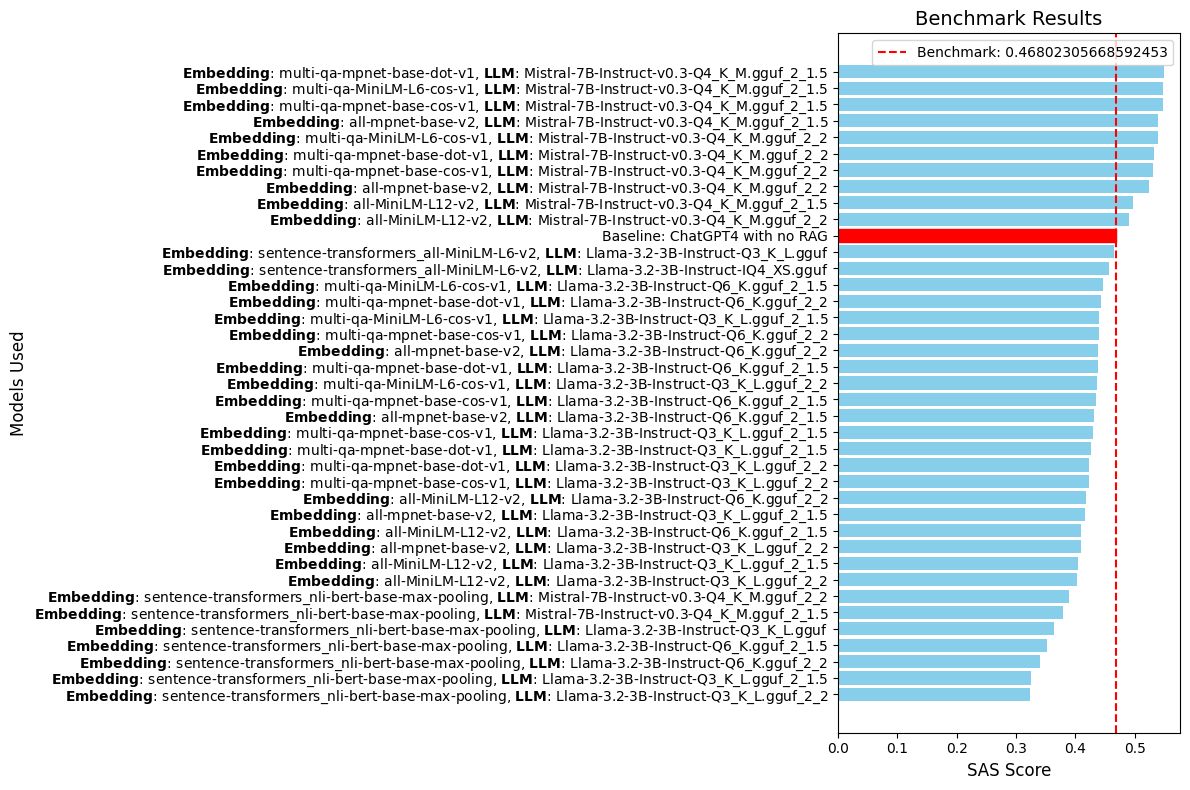

In [ ]:
import re
import matplotlib.pyplot as plt

# Updated regex to account for variations
pattern = r'results_([a-zA-Z0-9\-\(\)_]+)_model_weights_([a-zA-Z0-9\.\-\_]+(?:-[a-zA-Z0-9]+)*)(?:-Q\d+.*)?(?:_gguf.*?\d+.*)?\.csv'
results = highest_eval('/Users/stefanbozhilov/Documents/GitHub/Capstone-RAG-project/results', 'sas_evaluator')
updated_results = {}

for key, value in results.items():
    match = re.match(pattern, key)
    if match:
        embedding_model_name = match.group(1)
        llm_name = match.group(2)
        new_key = f'$\mathbf{{Embedding}}$: {embedding_model_name}, $\mathbf{{LLM}}$: {llm_name}'
        updated_results[new_key] = value
    else:
        # Handle unmatchable cases (e.g., log or retain original key)
        print(f"Key not matched: {key}")
        updated_results['Baseline: ChatGPT4 with no RAG'] = value  # Retaining the original key

# Sort results by value
sorted_results = sorted(updated_results.items(), key=lambda item: item[1])

labels = [item[0] for item in sorted_results]
values = [item[1] for item in sorted_results]

# Plotting
plt.figure(figsize=(12, 8))
plt.barh(labels, values, color='skyblue')
plt.xlabel("SAS Score", fontsize=12)
plt.ylabel("Models Used", fontsize=12)
plt.title("Benchmark Results", fontsize=14)
plt.tight_layout()

# Highlight benchmark value
benchmark = results.get("results_gpt4o-mini)_NO-RAG.csv", None)
if benchmark:
    plt.axvline(benchmark, color='red', linestyle='--', label=f"Benchmark: {benchmark}")
    benchmark_label = 'Baseline: ChatGPT4 with no RAG'
    benchmark_index = labels.index(benchmark_label)
    bars = plt.barh(labels, values, color='skyblue')
    bars[benchmark_index].set_color('red')
    plt.legend()


# Show plot
plt.show()